# Objective

Explore the dataset to identify differences between the customers of each product. You can also explore relationships between the different attributes of the customers. You can approach it from any other line of questioning that you feel could be relevant for the business. The idea is to get you comfortable working in Python.

You are expected to do the following :

1. Come up with a customer profile (characteristics of a customer) of the different products
2. Perform univariate and multivariate analyses
3. Generate a set of insights and recommendations that will help the company in targeting new customers.

## Data Dictionary:

The data is about customers of the treadmill product(s) of a retail store called Cardio Good Fitness.
It contains the following variables:

1. Product          - The model no. of the treadmill
2. Age              -  Age of the customer in no of years
3. Gender           - Gender of the customer
4. Education        - Education of the customer in no. of years
5. Marital Status   - Marital status of the customer
6. Usage            - Avg. # times the customer wants to use the treadmill every week
7. Fitness          - Self rated fitness score of the customer (5 - very fit, 1 - very unfit)
8. Income           - Income of the customer
9. Miles            - Miles that a customer expects to run

**Types of Data**

1. Qualitative Data:
     * Nominal:
         * Gender
         * Marital Status
         * Product
     * Ordinal:
         * Fitness
2. Quantitative Data:
    * Discrete:
         * Income
         * Age
         * Education
    * Continuous:
         * Usage
         * Miles


# Importing libraries - pandas, numpy, seaborn, matplotlib.pyplot


In [4]:
import pandas as pd
from pandas import Series

from warnings import filterwarnings
filterwarnings(action='ignore')
from pandas.api.types import CategoricalDtype
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import pandas_profiling
sns.set_style('whitegrid') # set the grid white
sns.set(color_codes=True)
pd.set_option('display.float_format', lambda float_num: '%.5f' % float_num) # Suppress numerical display in scientific notation

# Function Definitions

In [12]:
def first_steps_eda(**kwargs) -> None:
  """
  Load and describe the data set
  """

  (df := kwargs.get("data_frame"))


  # get the size of dataframe
  print('[*] Data has {} samples and {} features.'.format(df.shape[0], df.shape[1]))
  print("-" * 100)
  print(f"[*] Features : {df.columns.to_list()}\n\n")  # get name of columns/features

  print("-" * 100)
  print("[*] Missing values :\n\n", df.isnull().sum().sort_values(ascending=False))
  print("-" * 100)
  print("[*] Percent of missing :\n\n",
        round(df.isna().sum() / df.isna().count() * 100, 2).sort_values(ascending=False))
  print("-" * 100)
  print("[*] Dataset Info :")
  print(df.info())
  print("-" * 100)
  print("[*] Unique Values: ")
  print(df.nunique())
  print("-" * 100)
  '''
  print("\n[*] Checking for Unique Values: ")
  for feature_name in df.columns.tolist():  # Check for the unique values in the data
    print("Unique values in the column '{}' are \n\n".format(feature_name), data[feature_name].unique())
    print("-" * 100)
  '''
  print("\n[*] Descriptive Statistics from the Data")
  print(f"{df.describe().T}")
  print("-" * 100)
  print("\n[*] Outliers Identification ")
  for feature in df.select_dtypes(include=np.number).columns:  # Identifying Outliers
    identify_outliers_by_feature(df=data, feature=feature)

def identify_outliers_by_feature(df: pd.DataFrame, feature: str) -> None:
    """
    Identified Outliers in a variable
    :param df:
    :param feature:
    :return None:
        """
    # Calculate intrequatile range
    q25, q75 = np.percentile(df[feature], 25), np.percentile(df[feature], 75)
    iqr = q75 - q25
    print(f"Feature: {feature} \nIQR: {iqr}\nQ25: {q25}\nQ75: {q75}")
    # calculate the outlier cutoff
    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off
    print(f"CutOff: {cut_off}\nLower: {lower}\nUpper: {upper}")
    # identify outliers
    outliers = [x for x in df[feature] if x < lower or x > upper]
    print("Outliers Identified:")
    print(pd.Series(outliers).sort_values(ascending=False))
    print("==" * 10)

def correlation_matrix(df: pd.DataFrame):
    """
    A function to calculate and plot
    correlation matrix of a DataFrame.
    """
    # Create the matrix
    matrix = df.corr()

    # Create cmap
    cmap = sns.diverging_palette(250, 15, s=75, l=40,
                             n=9, center="light", as_cmap=True)
    # Create a mask
    mask = np.triu(np.ones_like(matrix, dtype=bool))

    # Make figsize bigger
    fig, ax = plt.subplots(figsize=(16,12))

    # Plot the matrix
    _ = sns.heatmap(matrix, mask=mask, center=0, annot=True,
             fmt='.2f', square=True, cmap=cmap, ax=ax)

def identify_correlated_features(df: pd.DataFrame, threshold: float)-> list:
    """
    A function to identify highly correlated features.
    """
    # Compute correlation matrix with absolute values
    matrix = df.corr().abs()

    # Create a boolean mask
    # create a boolean mask which will be used to subset the matrix:
    mask = np.triu(np.ones_like(matrix, dtype=bool))

    # Subset the matrix
    # Using the mask method of Pandas DataFrames (correlation matrix is a DataFrame) puts NaN values to the upper half and diagonal of the matrix
    reduced_matrix = matrix.mask(mask)

    # Find cols that meet the threshold
    to_drop = [c for c in reduced_matrix.columns if \
              any(reduced_matrix[c] > threshold)]

    return to_drop

def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage
    plt.figure(figsize=(10,5))
    plt.show()  # show the plot

# function to plot a boxplot and a histogram along the same scale.

def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="red", linestyle="-"
    )  # Add median to the histogram

def stacked_plot(x: Series,  y :Series):
    sns.set(palette='Dark2')
    tab1 = pd.crosstab(x,y,margins=True)
    print(tab1)
    print('-'*120)
    tab = pd.crosstab(x,y,normalize='index')
    tab.plot(kind='bar',stacked=True,figsize=(10,5))
    plt.legend(loc='lower left', frameon=True)
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.ylabel('Percentage')
    plt.show()

def distribution_plot_feature_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title(f"Distribution of target={target} for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title(f"Distribution of target={target} for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title(f"Boxplot {target} target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title(f"Boxplot (without outliers) {target} target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

# functions to treat outliers
def treat_outliers(df, col):
    """
    Treats outliers in a variable

    df: dataframe
    col: dataframe column
    """
    Q1 = df[col].quantile(0.25)  # 25th quantile
    Q3 = df[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR

    # all the values smaller than Lower_Whisker will be assigned the value of Lower_Whisker
    # all the values greater than Upper_Whisker will be assigned the value of Upper_Whisker
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker)

    return df


def treat_outliers_all(df, col_list):
    """
    Treat outliers in a list of variables

    df: dataframe
    col_list: list of dataframe columns
    """
    for c in col_list:
        df = treat_outliers(df, c)

    return df



# Exploratory Data Analysis

**Understanding the Data**

- Overview of the dataset shape, datatypes - Statistical summary and check for missing values

In [6]:
data = pd.read_csv('CardioGoodFitness.csv')


In [7]:
first_steps_eda(data_frame=data)

[*] Data has 180 samples and 9 features.
----------------------------------------------------------------------------------------------------
[*] Features : ['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage', 'Fitness', 'Income', 'Miles']


----------------------------------------------------------------------------------------------------
[*] Missing values :

 Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64
----------------------------------------------------------------------------------------------------
[*] Percent of missing :

 Product         0.00000
Age             0.00000
Gender          0.00000
Education       0.00000
MaritalStatus   0.00000
Usage           0.00000
Fitness         0.00000
Income          0.00000
Miles           0.00000
dtype: float64
----------------------------------------------------------------------------

## Observations:

* 180 observations and 9 features
* Features ['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage', 'Fitness', 'Income', 'Miles']
* No missing values
* Data types int64(6), object(3)
* Unique Values
Product           3
Age              32
Gender            2
Education         8
MaritalStatus     2
Usage             6
Fitness           5
Income           62
Miles            37
* Customers Age range from 18-50, Mean Age in this dataset is 28
* Educations in years from the customers range from 12-21, Education mean is 15 years
* Usage range from 2-7 times the customer wants to use the treadmill every week, Usage mean is 3




# Univariate Analysis
## PRODUCT

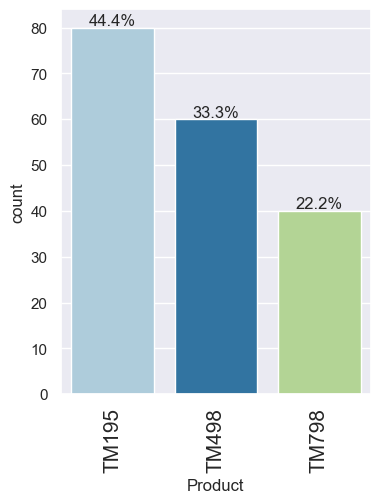

<Figure size 1000x500 with 0 Axes>

In [8]:
labeled_barplot(data=data, feature='Product', perc=True)

Observations:

* We have three trend-mile models TM195, TM498, and TM798

## AGE

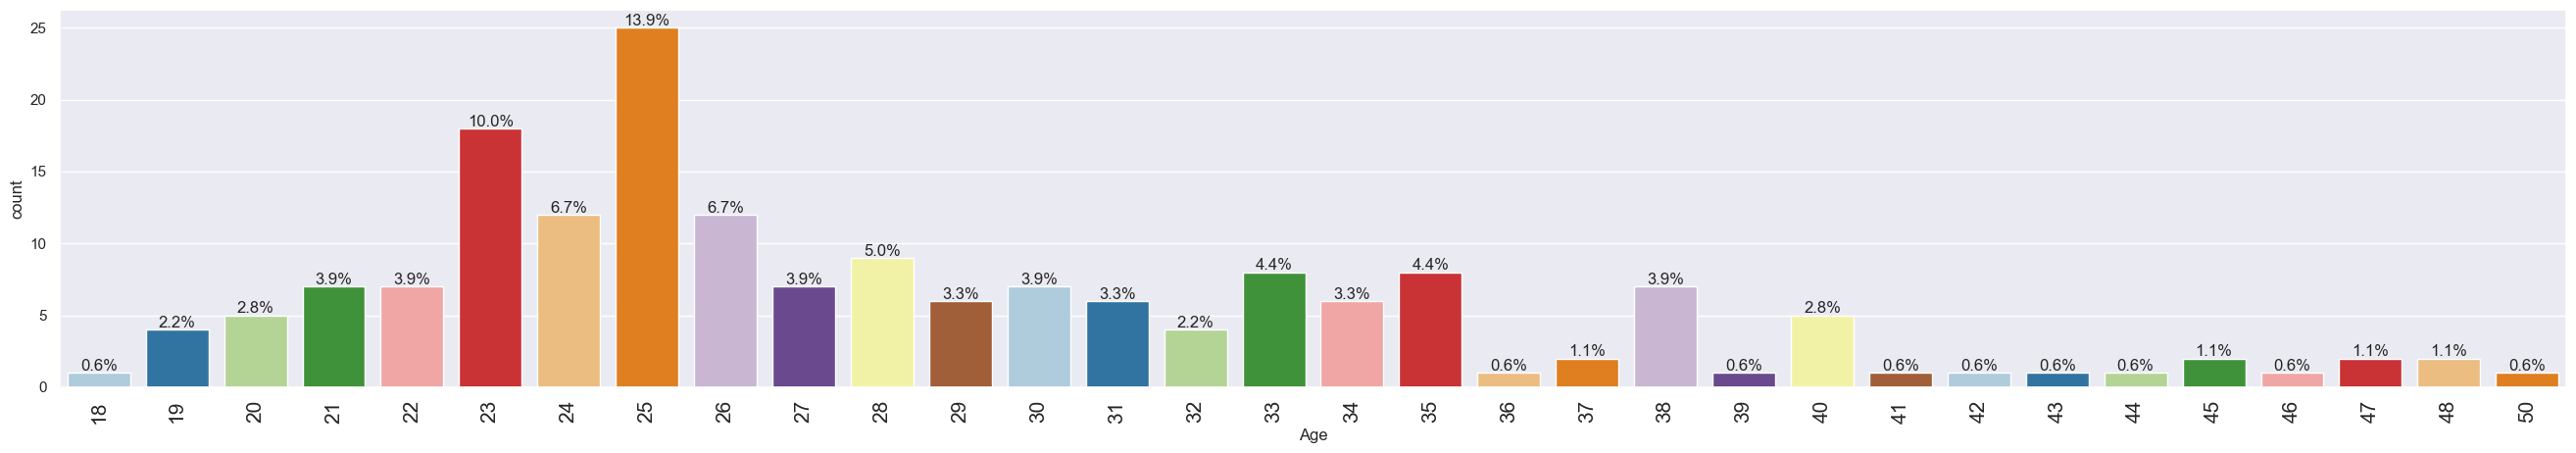

<Figure size 1000x500 with 0 Axes>

In [9]:
labeled_barplot(data=data, perc=True, feature='Age')

Observations:

* The range is 18-50 years old
* We can see, Customers under the 20 are predominant


## GENDER

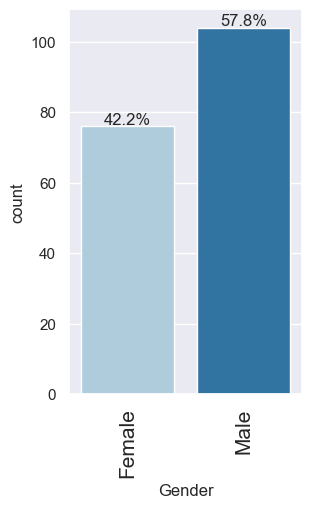

<Figure size 1000x500 with 0 Axes>

In [11]:
labeled_barplot(data=data, feature='Gender', perc=True)

Observations:

* Male is predominant

## EDUCATION

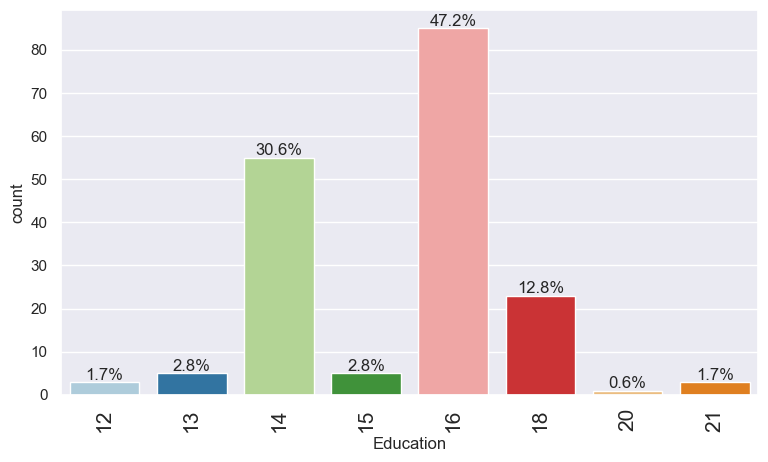

<Figure size 1000x500 with 0 Axes>

In [13]:
labeled_barplot(feature='Education', perc=True, data=data)

Observations

* 16 and 14 years old, are predominant

## MARITAL STATUS

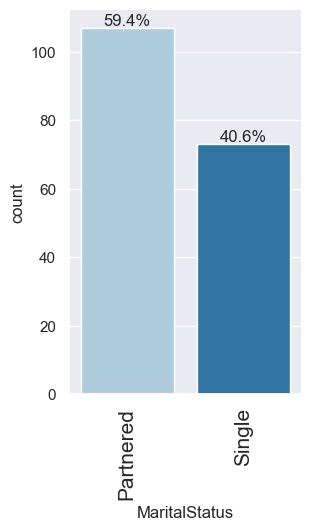

<Figure size 1000x500 with 0 Axes>

In [17]:
labeled_barplot(perc=True, feature='MaritalStatus', data=data)


Observations:
* Most of the customers are either married or engage

## USAGE

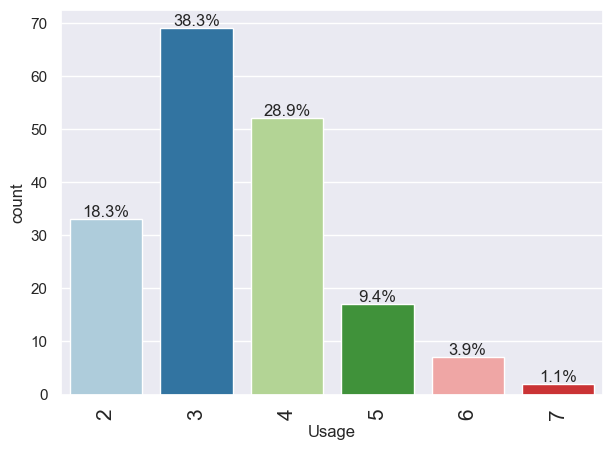

<Figure size 1000x500 with 0 Axes>

In [18]:
labeled_barplot(feature='Usage',data=data, perc=True)

Observation:

* Most Customers are planing to use the machine at least three times

## INCOME

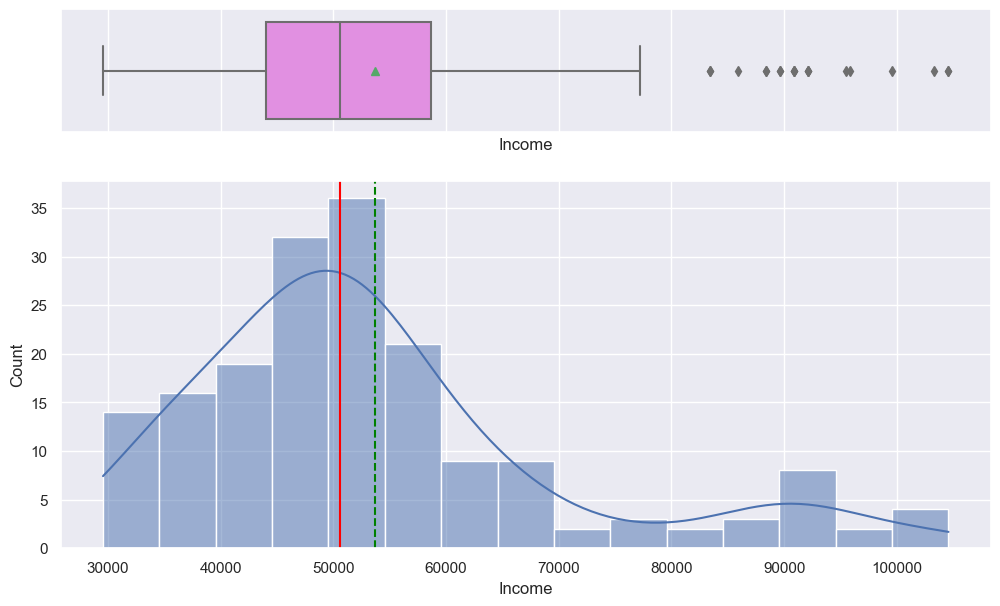

In [24]:
histogram_boxplot(data=data, feature='Income', figsize=(12, 7), kde=True, bins=None)

Observations:

* The distribution is right skewed
* It has several outliers
* Mode and Median are slightly close

## FITNESS

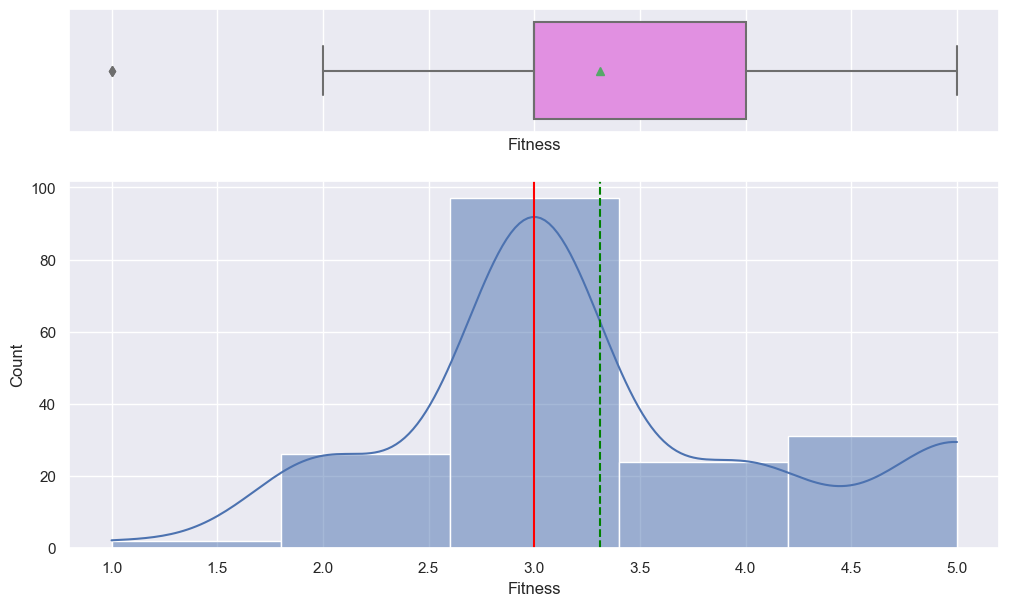

In [29]:
labeled_barplot(data=data, feature='Fitness', perc=True)

Observations:

* This feature has slightly normal distribution
* Most of the customers consider themselves fit

## MILES

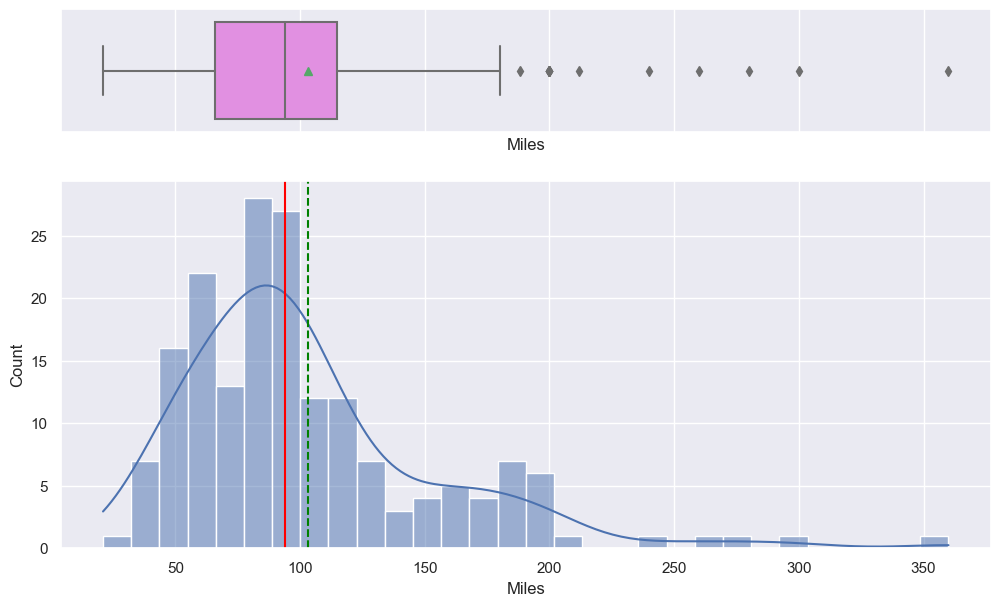

In [41]:
histogram_boxplot(data=data, feature='Miles', figsize=(12, 7), kde=True, bins=30)

Observations:

* The distribution of this feature is right skewed
* Mean and Mode are slightly close
* Most of the customers pretend to run <= 100 miles
* This feature has some outliers, some customers expect to run more than 350 miles

# Bivariate Analysis

## Income VS Age

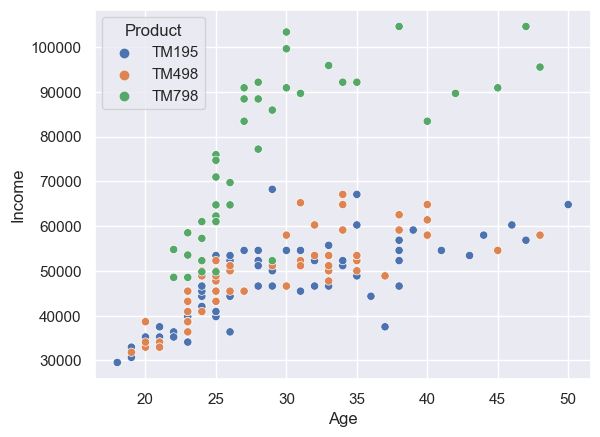

In [47]:
sns.scatterplot(data=data, x='Age',y='Income', hue='Product')
plt.show()

Observations:

* Age and Income are high correlated
* Customer with The Highest Income > 50,000 and Age between 23 - 35 prefer TM195
* Customers with <= 70,000 income prefer TM195 or TM498
*

In [3]:
def reverse_word(word):  
    reversed = ""
    for letter in word:
            reversed = letter + reversed
    return reversed
reverse_word('palo')

'olap'